In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn-white')

In [2]:
data = pd.read_csv('./Iris.csv')
data.shape

(150, 6)

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


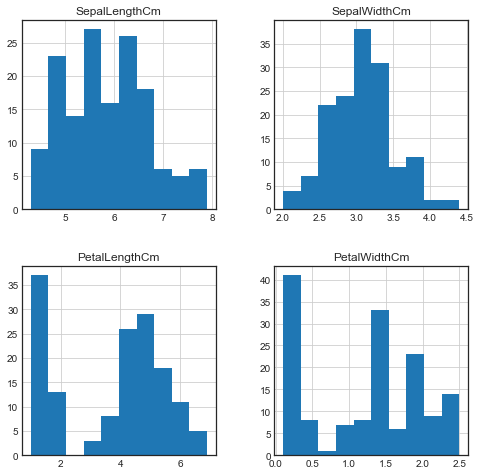

In [16]:
data.hist(figsize=(8,8))
plt.show()

In [4]:
data = data.drop(columns=['Id'])

In [5]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
x = np.array(data.iloc[:,:-1].values)
y = np.array(data['Species'])
x[0],y[0]

(array([5.1, 3.5, 1.4, 0.2]), 'Iris-setosa')

In [20]:
from sklearn.model_selection import KFold
split = 10
folds = KFold(n_splits=split)

In [28]:
acc = list()
model = LogisticRegression(solver='liblinear')
for train_index, test_index in folds.split(x,y):
    x_train, x_test, y_train, y_test = x[train_index], x[test_index],y[train_index], y[test_index]
    model.fit(x_train, y_train)
    acc.append(model.score(x_test, y_test))
acc

[1.0,
 1.0,
 1.0,
 0.8666666666666667,
 0.7333333333333333,
 0.6666666666666666,
 1.0,
 0.9333333333333333,
 0.6,
 1.0]

Text(0, 0.5, 'Accuracy')

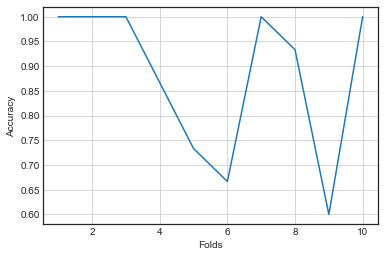

In [30]:
plt.plot(range(1, split + 1), acc)
plt.grid()
plt.xlabel("Folds")
plt.ylabel("Accuracy")

In [27]:
print("Average accuracy : " + str((sum(lr)/split)*100)+"%")

Average accuracy : 88.00000000000001%
